In [2]:
# !pip install pysinewave

In [1]:
# from pysinewave import SineWave

# # Create a sine wave, with a starting pitch of 12, and a pitch change speed of 10/second.
# sinewave = SineWave(pitch = 12, pitch_per_second = 10)

# # Turn the sine wave on.
# sinewave.play()

# # Sleep for 2 seconds, as the sinewave keeps playing.
# time.sleep(2)

# # Set the goal pitch to -5.
# sinewave.set_pitch(-5)

# # Sleep for 3 seconds, as the sinewave smoothly slides its pitch down from 12 to -5, and stays there.
# time.sleep(3)

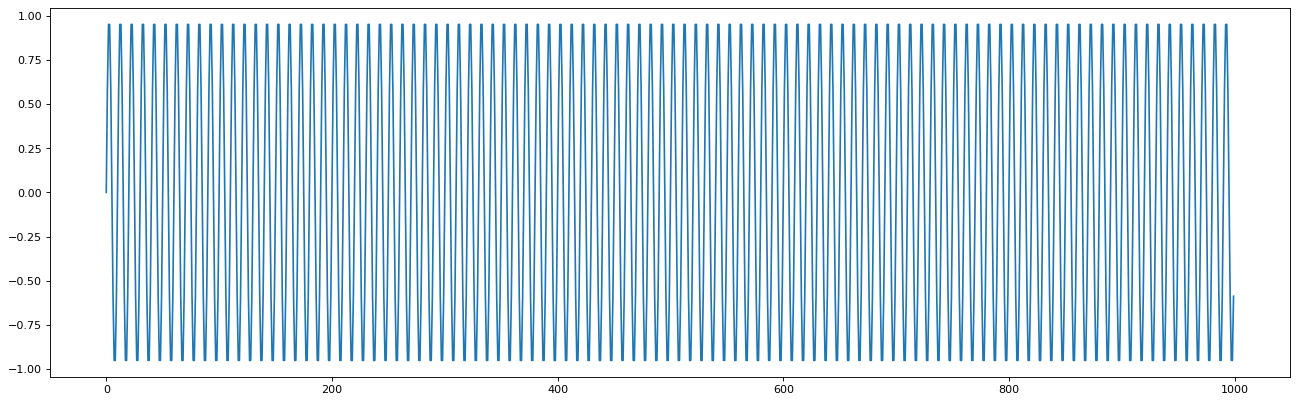

In [2]:
import numpy as np
import matplotlib.pyplot as plt
start_time = 0
end_time = 1
sample_rate = 1000
time = np.arange(start_time, end_time, 1/sample_rate)
theta = 0
frequency = 100
amplitude = 1
sinewave = amplitude * np.sin(2 * np.pi * frequency * time + theta)
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(sinewave)

In [83]:
import numpy as np
from scipy.io import wavfile

fs = 22000

f = 100
t = 10

samples = np.arange(t * fs) / fs

wave = np.sin(2 * np.pi * f * samples)

wave *= f

wave = np.int16(wave)

wavfile.write('sinewave.wav', fs, wave)

In [81]:
len(wave)

88000

In [29]:

noise = np.random.normal(0,5,22000*10)

In [13]:
len(signal)

44000

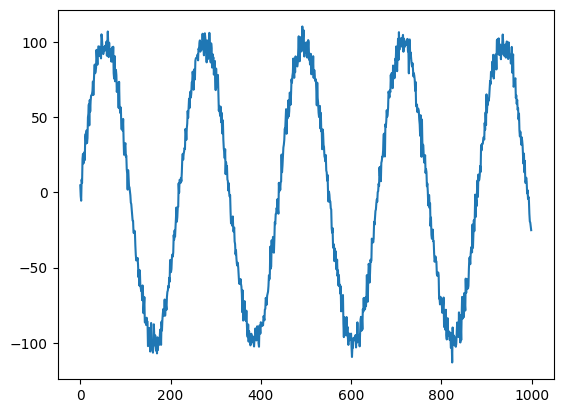

In [30]:
plt.plot(signal[:1000]+noise[:1000])

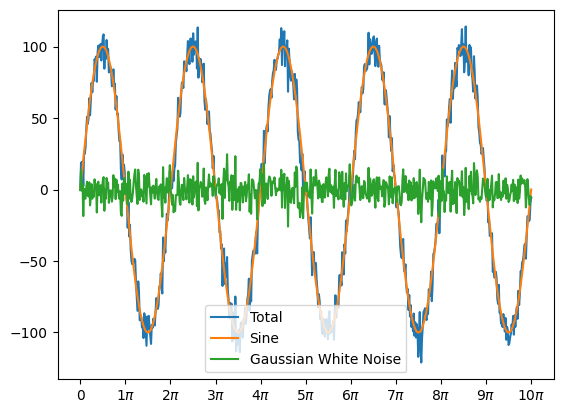

In [31]:
from matplotlib.ticker import FuncFormatter, MultipleLocator
import matplotlib.pyplot as plt

x = np.linspace(0, 10 * np.pi, num=600)
n = np.random.normal(scale=8, size=x.size)
s = 100 * np.sin(x)
y = 100 * np.sin(x) + n

plt.Figure(figsize=(1, 1.5), dpi=80)
plt.plot(x, y, label='Total')
plt.plot(x, s, label='Sine')
plt.plot(x, n, label='Gaussian White Noise')
ax = plt.gca()

ax.xaxis.set_major_formatter(FuncFormatter(
    lambda val, pos: '{:.0f}$\pi$'.format(val / np.pi) if val != 0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))

plt.legend()
plt.savefig("noisey_sine.png", dpi=80)
plt.show()

In [32]:
wavfile.write('sinewave.wav', fs, y)

In [84]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

"""
parameters: 
rhp - spectral noise density unit/SQRT(Hz)
sr  - sample rate
n   - no of points
mu  - mean value, optional

returns:
n points of noise signal with spectral noise density of rho
"""
def white_noise(rho, sr, n, mu=0):
    sigma = rho * np.sqrt(sr/2)
    noise = np.random.normal(mu, sigma, n)
    return noise

rho = 1 
sr = 22000
n = 88000
period = n/sr
time = np.linspace(0, period, n)
signal_pure = np.int16(100*np.sin(2*np.pi*13*time))
noise = white_noise(rho, sr, n)
signal_with_noise = np.int16(signal_pure + noise)

f, psd = signal.periodogram(signal_with_noise, sr)

In [85]:
len(time)

88000

In [86]:
wavfile.write('signal_pure.wav', sr, signal_pure)
wavfile.write('signal_with_noise.wav', sr, signal_with_noise)

Mean spectral noise density =  1.19937 arb.u/SQRT(Hz)


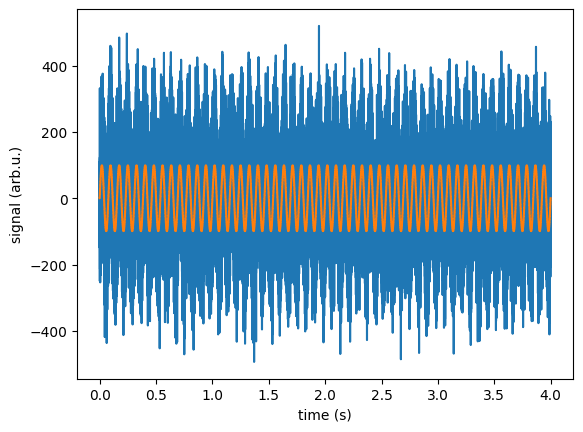

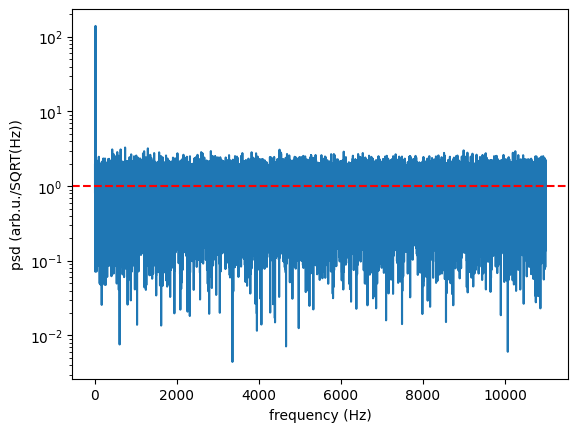

In [87]:
print("Mean spectral noise density = ",np.sqrt(np.mean(psd[50:])), "arb.u/SQRT(Hz)")

plt.plot(time, signal_with_noise)
plt.plot(time, signal_pure)
plt.xlabel("time (s)")
plt.ylabel("signal (arb.u.)")
plt.show()

plt.semilogy(f[1:], np.sqrt(psd[1:]))
plt.xlabel("frequency (Hz)")
plt.ylabel("psd (arb.u./SQRT(Hz))")
#plt.axvline(13, ls="dashed", color="g")
plt.axhline(rho, ls="dashed", color="r")
plt.show()

In [ ]:
import diffwave # github installation!!!
import torch
import numpy as np
from diffwave.dataset import *
from diffwave.params import params, AttrDict # unconditional parameter not accessible?
from diffwave.preprocess import *
from diffwave.model import *

In [ ]:
# diffwave.preprocess.main(AttrDict({'dir': './../data/LJ028'}))